In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta_archivo1 = "Datasets/Electric and Alternative Fuel Charging Stations.csv"
df = pd.read_csv(ruta_archivo1)

df.head()

/tmp/ipykernel_31897/4069314451.py:2: DtypeWarning: Columns (6,16,20,31,33,36,39,40,41,43,46,52,53,55,57,58,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo1)


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,NaN,NaN,E,...,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,HD,NaN,NaN,NaN
4,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,NaN,479-783-3188,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    70406 non-null  object 
 1   Station Name                      70406 non-null  object 
 2   Street Address                    70405 non-null  object 
 3   Intersection Directions           4492 non-null   object 
 4   City                              70406 non-null  object 
 5   State                             70406 non-null  object 
 6   ZIP                               70405 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     65204 non-null  object 
 9   Status Code                       70406 non-null  object 
 10  Expected Date                     1218 non-null   object 
 11  Groups With Access Code           70406 non-null  object 
 12  Acce

# ETL

In [4]:
# Definir el umbral de valores no nulos
threshold = 5000

# Eliminar las columnas con menos de 5000 datos válidos
df = df.dropna(thresh=threshold, axis=1)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    70406 non-null  object 
 1   Station Name                      70406 non-null  object 
 2   Street Address                    70405 non-null  object 
 3   City                              70406 non-null  object 
 4   State                             70406 non-null  object 
 5   ZIP                               70405 non-null  object 
 6   Station Phone                     65204 non-null  object 
 7   Status Code                       70406 non-null  object 
 8   Groups With Access Code           70406 non-null  object 
 9   Access Days Time                  66628 non-null  object 
 10  Cards Accepted                    11289 non-null  object 
 11  EV Level2 EVSE Num                54144 non-null  float64
 12  EV D

In [6]:
df.rename(columns={
    'Fuel Type Code': 'CodCombustible',
    'Station Name': 'NombreEstacion',
    'Street Address': 'Direccion',
    'City': 'Ciudad',
    'State': 'Estado',
    'ZIP': 'CodigoPostal',
    'Station Phone': 'TelefonoEstacion',
    'Status Code': 'CodigoEstado',
    'Groups With Access Code': 'GruposAcceso',
    'Access Days Time': 'HorarioAcceso',
    'Cards Accepted': 'TarjetasAceptadas',
    'EV Level2 EVSE Num': 'NumCargadoresNivel2',
    'EV DC Fast Count': 'NumCargadoresRapidos',
    'EV Network': 'RedCargaEV',
    'EV Network Web': 'WebRedCargaEV',
    'Geocode Status': 'EstadoGeocodigo',
    'Latitude': 'Latitud',
    'Longitude': 'Longitud',
    'Date Last Confirmed': 'FechaUltimaConfirm',
    'ID': 'ID',
    'Updated At': 'FechaActualizacion',
    'Owner Type Code': 'CodigoTipoPropietario',
    'Open Date': 'FechaApertura',
    'EV Connector Types': 'TiposConectoresEV',
    'Country': 'Pais',
    'Access Days Time (French)': 'HorarioAccesoFR',
    'Groups With Access Code (French)': 'GruposAccesoFR',
    'Access Code': 'CodigoAcceso',
    'Access Detail Code': 'CodigoDetalleAcceso',
    'Facility Type': 'TipoInstalacion',
    'EV Pricing': 'PrecioCargaEV',
    'Restricted Access': 'AccesoRestringido'
}, inplace=True)


In [7]:
print(df.head())

  CodCombustible                                NombreEstacion  \
0            CNG          Spire - Montgomery Operations Center   
1            CNG                           PS Energy - Atlanta   
2            CNG  Metropolitan Atlanta Rapid Transit Authority   
3            CNG                         United Parcel Service   
4            CNG                    Arkansas Oklahoma Gas Corp   

              Direccion      Ciudad Estado CodigoPostal TelefonoEstacion  \
0      2951 Chestnut St  Montgomery     AL        36107              NaN   
1      340 Whitehall St     Atlanta     GA        30303     770-350-3000   
2   2424 Piedmont Rd NE     Atlanta     GA        30324              NaN   
3  270 Marvin Miller Dr     Atlanta     GA        30336              NaN   
4     2100 S Waldron Rd  Fort Smith     AR        72903     479-783-3188   

  CodigoEstado                       GruposAcceso   HorarioAcceso  ...  \
0            E                            Private             NaN  ...  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CodCombustible         70406 non-null  object 
 1   NombreEstacion         70406 non-null  object 
 2   Direccion              70405 non-null  object 
 3   Ciudad                 70406 non-null  object 
 4   Estado                 70406 non-null  object 
 5   CodigoPostal           70405 non-null  object 
 6   TelefonoEstacion       65204 non-null  object 
 7   CodigoEstado           70406 non-null  object 
 8   GruposAcceso           70406 non-null  object 
 9   HorarioAcceso          66628 non-null  object 
 10  TarjetasAceptadas      11289 non-null  object 
 11  NumCargadoresNivel2    54144 non-null  float64
 12  NumCargadoresRapidos   8307 non-null   float64
 13  RedCargaEV             60907 non-null  object 
 14  WebRedCargaEV          50305 non-null  object 
 15  Es

In [9]:
# Convertir las columnas 'FechaApertura', 'FechaUltimaConfirm', y 'FechaActualizacion' de object a datetime
df['FechaApertura'] = pd.to_datetime(df['FechaApertura'])
df['FechaUltimaConfirm'] = pd.to_datetime(df['FechaUltimaConfirm'])
df['FechaActualizacion'] = pd.to_datetime(df['FechaActualizacion'])

# Verificar los cambios mostrando los tipos de datos de las columnas
print(df.dtypes)



CodCombustible                        object
NombreEstacion                        object
Direccion                             object
Ciudad                                object
Estado                                object
CodigoPostal                          object
TelefonoEstacion                      object
CodigoEstado                          object
GruposAcceso                          object
HorarioAcceso                         object
TarjetasAceptadas                     object
NumCargadoresNivel2                  float64
NumCargadoresRapidos                 float64
RedCargaEV                            object
WebRedCargaEV                         object
EstadoGeocodigo                       object
Latitud                              float64
Longitud                             float64
FechaUltimaConfirm            datetime64[ns]
ID                                     int64
FechaActualizacion       datetime64[ns, UTC]
CodigoTipoPropietario                 object
FechaApert

In [10]:

valores_unicos_pais = df['Pais'].unique()

# Imprimir los valores únicos encontrados en la columna de país
print(valores_unicos_pais)


['US' 'CA']


In [12]:
# Eliminar filas de Canadá
df = df[df['Pais'] != 'CA']


In [11]:
# Eliminar las columnas 'HorarioAccesoFR' y 'GruposAccesoFR'
df.drop(columns=['HorarioAccesoFR', 'GruposAccesoFR'], inplace=True)



In [13]:
# Verificar los cambios
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 61621 entries, 0 to 70403
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   CodCombustible         61621 non-null  object             
 1   NombreEstacion         61621 non-null  object             
 2   Direccion              61620 non-null  object             
 3   Ciudad                 61621 non-null  object             
 4   Estado                 61621 non-null  object             
 5   CodigoPostal           61621 non-null  object             
 6   TelefonoEstacion       57447 non-null  object             
 7   CodigoEstado           61621 non-null  object             
 8   GruposAcceso           61621 non-null  object             
 9   HorarioAcceso          58717 non-null  object             
 10  TarjetasAceptadas      10145 non-null  object             
 11  NumCargadoresNivel2    47506 non-null  float64            


# EDA

Estadísticas descriptivas:
    
- NumCargadoresNivel2: El promedio de cargadores de nivel 2 por estación es aproximadamente 2.32, con una desviación estándar de 3.23, lo que indica una variabilidad moderada en la cantidad de cargadores disponibles. El rango va desde 1 hasta 311 cargadores.

- NumCargadoresRapidos: La media de cargadores rápidos por estación es de 3.85, con una desviación estándar de 4.36, lo que sugiere una variabilidad aún mayor en la disponibilidad de cargadores rápidos. El máximo de cargadores rápidos en una estación es de 56.

- FechaUltimaConfirm y FechaApertura: Las fechas de última confirmación y apertura varían desde 2017 hasta 2022, con la mayoría de las confirmaciones y aperturas concentradas en fechas más recientes, lo que sugiere una tendencia hacia la expansión reciente de la infraestructura de carga de autos eléctricos. La fecha de apertura más antigua es de 1974 que, con seguridad, es un error.

In [14]:
df.describe()

,NumCargadoresNivel2,NumCargadoresRapidos,Latitud,Longitud,FechaUltimaConfirm,ID,FechaApertura
count,47506.000000,6588.000000,61621.000000,61621.000000,61454,61621.000000,61347
mean,2.322949,3.853673,37.812616,-97.438785,2022-02-24 16:15:38.692355328,148839.844728,2019-01-10 12:51:43.369358080
min,1.000000,1.000000,18.334138,-159.788556,2017-06-02 00:00:00,17.000000,1974-11-15 00:00:00
25%,2.000000,1.000000,34.044509,-117.939012,2021-11-04 00:00:00,113358.000000,2017-10-28 12:00:00
50%,2.000000,2.000000,38.323741,-94.143129,2022-07-25 00:00:00,167864.000000,2020-09-30 00:00:00
75%,2.000000,6.000000,41.525058,-80.328586,2022-07-25 00:00:00,190936.000000,2021-06-02 00:00:00
max,311.000000,56.000000,64.852466,40.432278,2022-07-25 00:00:00,224380.000000,2022-07-26 00:00:00
std,3.234528,4.357365,5.000914,19.045917,NaN,55658.563843,NaN


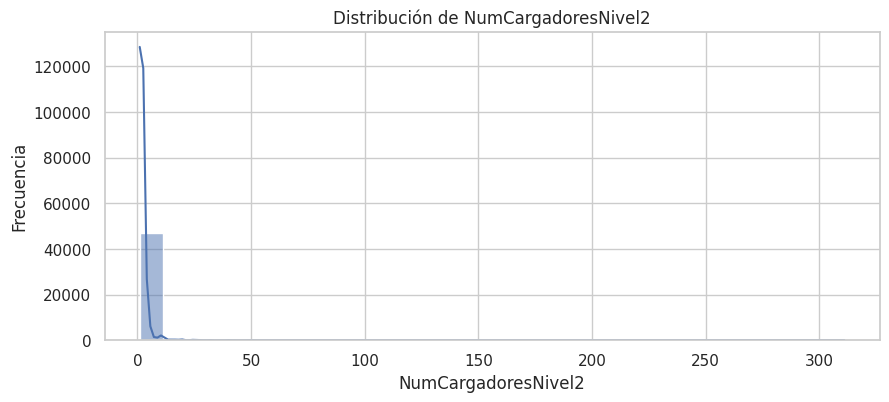

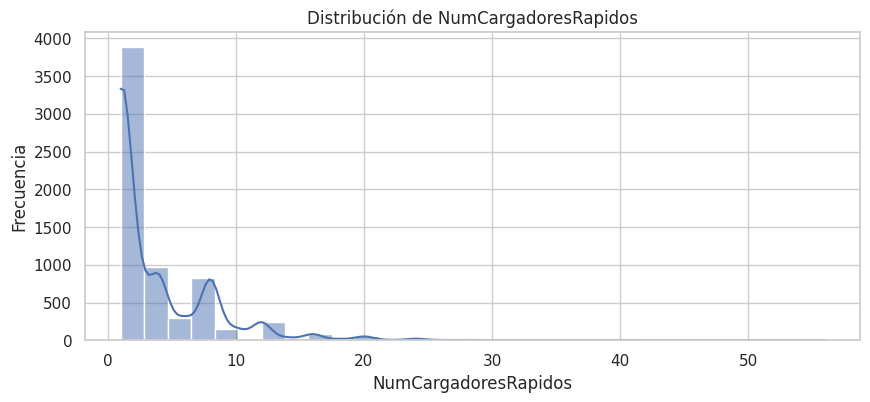

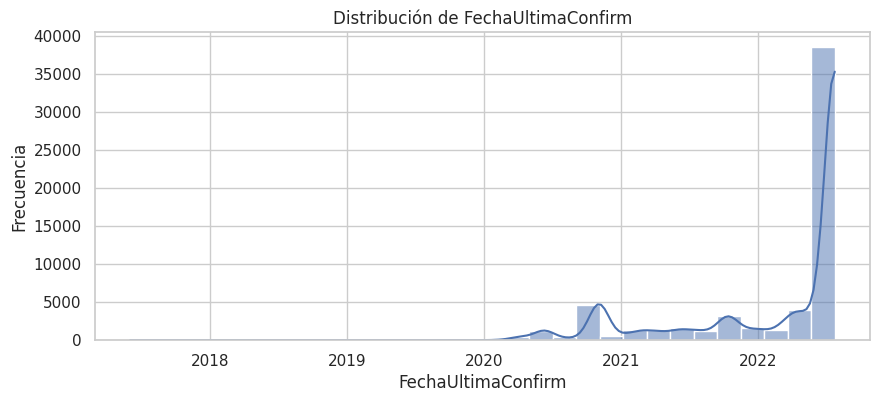

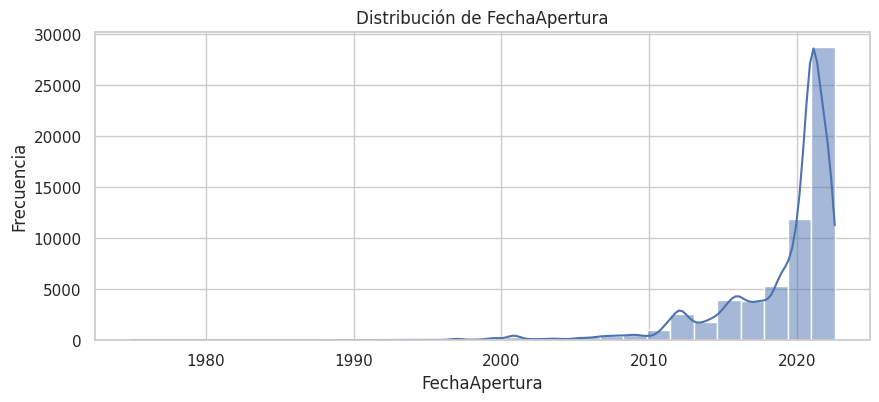

In [16]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Histogramas de variables numéricas actualizadas con los nuevos nombres
num_columns = ['NumCargadoresNivel2', 'NumCargadoresRapidos', 'FechaUltimaConfirm', 'FechaApertura']

for column in num_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


In [17]:
# Conteo de valores nulos
print(df[num_columns].isnull().sum())

NumCargadoresNivel2     14115
NumCargadoresRapidos    55033
FechaUltimaConfirm        167
FechaApertura             274
dtype: int64


En la matriz no hay ninguna correlación que sea relevante.

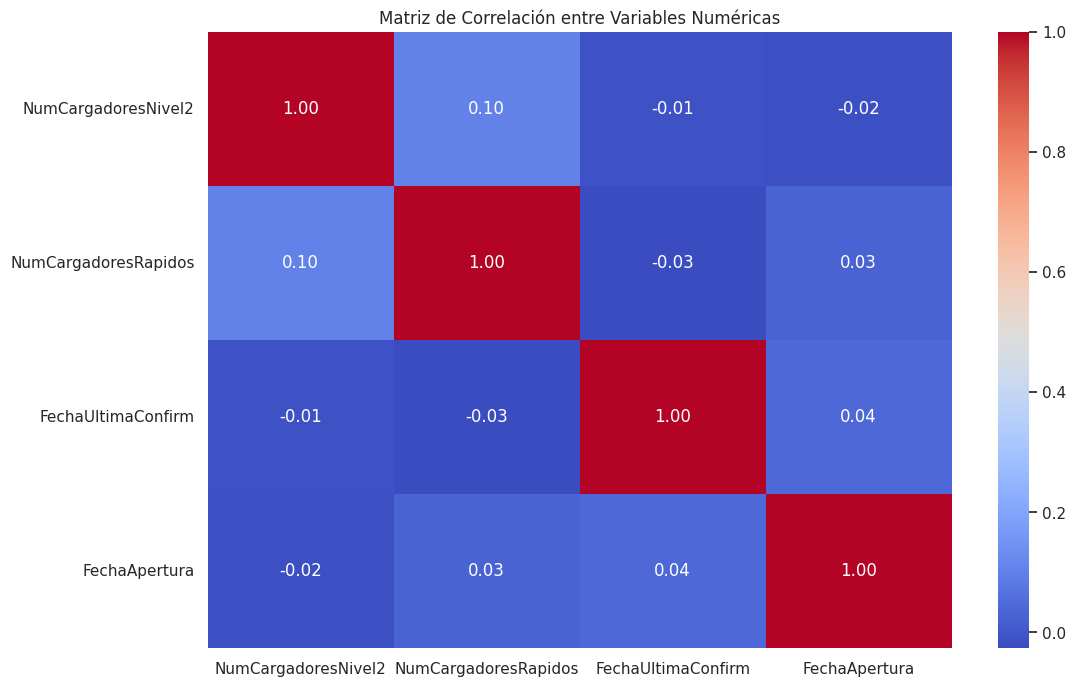

In [19]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

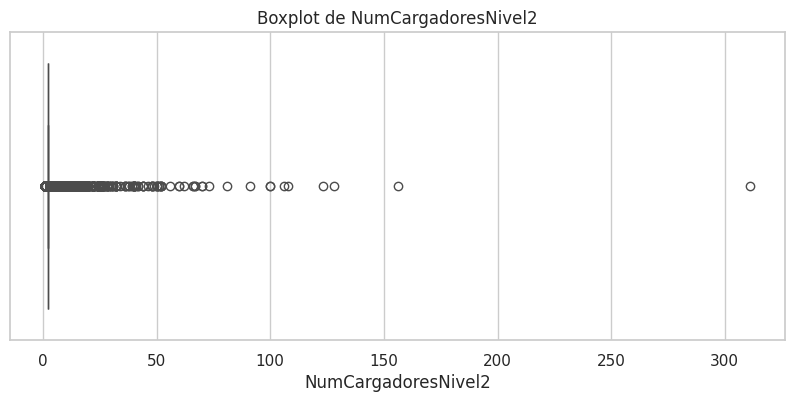

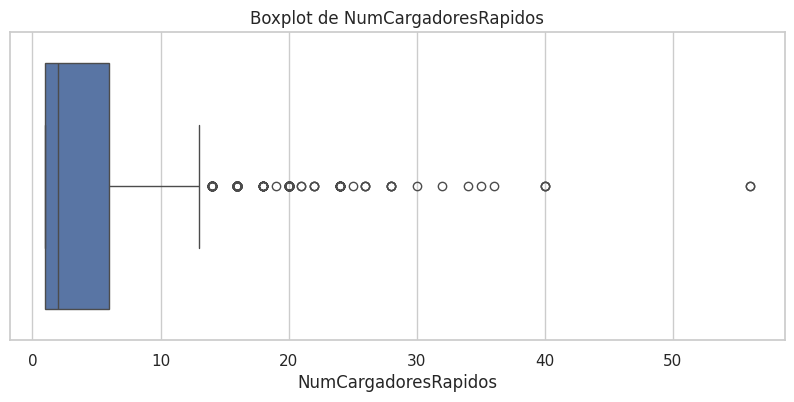

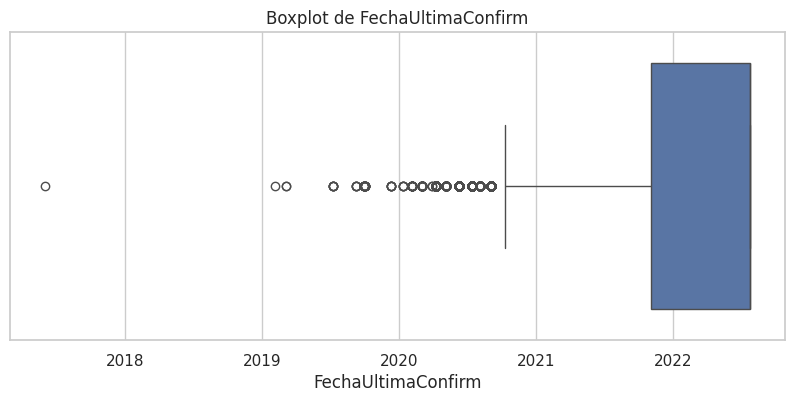

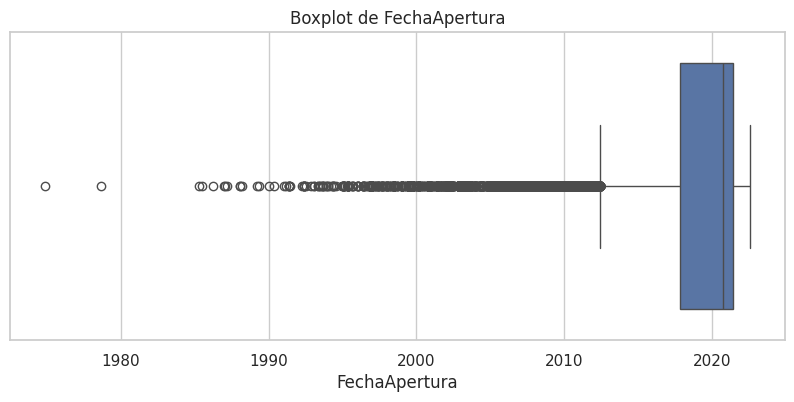

In [21]:
for column in num_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()


Cruce datos

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61621 entries, 0 to 70403
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   CodCombustible         61621 non-null  object             
 1   NombreEstacion         61621 non-null  object             
 2   Direccion              61620 non-null  object             
 3   Ciudad                 61621 non-null  object             
 4   Estado                 61621 non-null  object             
 5   CodigoPostal           61621 non-null  object             
 6   TelefonoEstacion       57447 non-null  object             
 7   CodigoEstado           61621 non-null  object             
 8   GruposAcceso           61621 non-null  object             
 9   HorarioAcceso          58717 non-null  object             
 10  TarjetasAceptadas      10145 non-null  object             
 11  NumCargadoresNivel2    47506 non-null  float64            


In [32]:
# Estaciones con más cargadores
df['TotalCargadores'] = df['NumCargadoresNivel2'].fillna(0) + df['NumCargadoresRapidos'].fillna(0)
estaciones_mas_cargadores = df.sort_values(by='TotalCargadores', ascending=False)[['NombreEstacion', 'TotalCargadores']]
estaciones_mas_cargadores.head(10)

,NombreEstacion,TotalCargadores
159,LADWP - John Ferraro Building,313.0
5516,San Diego Gas and Electric,156.0
37553,Tesla Gigafactory - Tesla Destination,128.0
6713,Yahoo,123.0
13213,NREL Employee Parking Garage,108.0
34401,EVCN_Harborwalk_Oakland_S,106.0
10768,Los Angeles Police Department - Main Street Pa...,104.0
9644,United Parcel Service,100.0
38874,City of San Francisco - 49 SVN,91.0
38870,Caltech - California Garage,81.0


In [31]:
# Ciudades con más estaciones
ciudades_mas_estaciones = df.groupby('Ciudad').size().sort_values(ascending=False)
ciudades_mas_estaciones.head(10)

Ciudad
Los Angeles      1584
San Diego         918
Atlanta           608
San Jose          587
Irvine            580
Austin            576
Kansas City       463
San Francisco     453
Seattle           429
Boston            396
dtype: int64